In [90]:
import pandas as pd
avg_budget = 2.0
worker_num = 300
df = pd.read_csv('./result/dash.csv')
df = df[(df['avg-budget'] == avg_budget)&(df['worker']== worker_num)]
df1 = df.groupby(['method','task'])['fairness-pairwise'].agg(['mean','max','min']).reset_index()

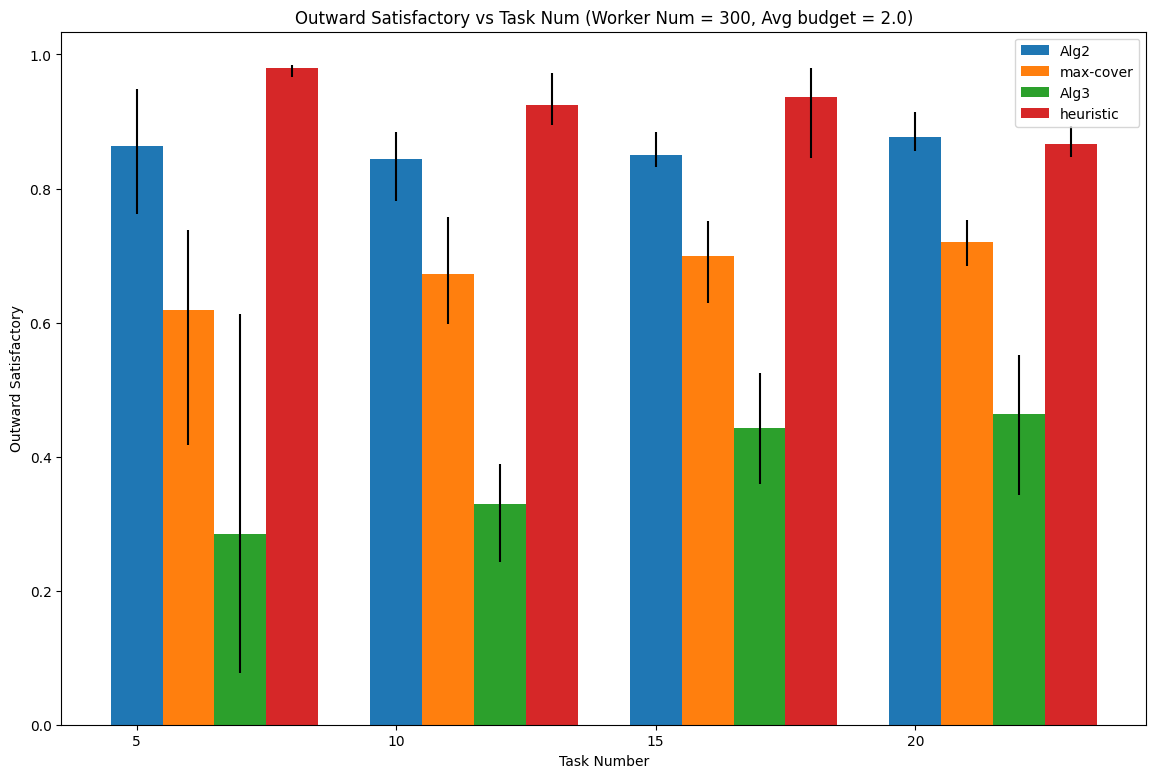

In [91]:
import numpy as np
import matplotlib.pyplot as plt

methods = ['budget','max-cover','matroid','heuristic']
labels = ['Alg2','max-cover','Alg3','heuristic']
bar_width = 0.2

# 设置位置偏移，以便将直方图居中显示
bar_positions = range(len(df1['task'].unique()))
# 绘制折线图
plt.figure(figsize=(14, 9))
x_labels = [5,10,15,20]
plt.xticks(bar_positions,x_labels)

for i,method in enumerate(methods):
    method_data = df1[df1['method'] == method]
    current_bar_positions = [pos + i * bar_width for pos in bar_positions]
    plt.bar(current_bar_positions, method_data['mean'],yerr=[method_data['mean']-method_data['min'],method_data['max']-method_data['mean']],width = bar_width,label=labels[i])

# 添加标签和图例
plt.xlabel('Task Number')
plt.ylabel('Outward Satisfactory')
plt.title('Outward Satisfactory vs Task Num (Worker Num = {}, Avg budget = {})'.format(worker_num,avg_budget))
plt.legend()

# 显示图形
plt.show()

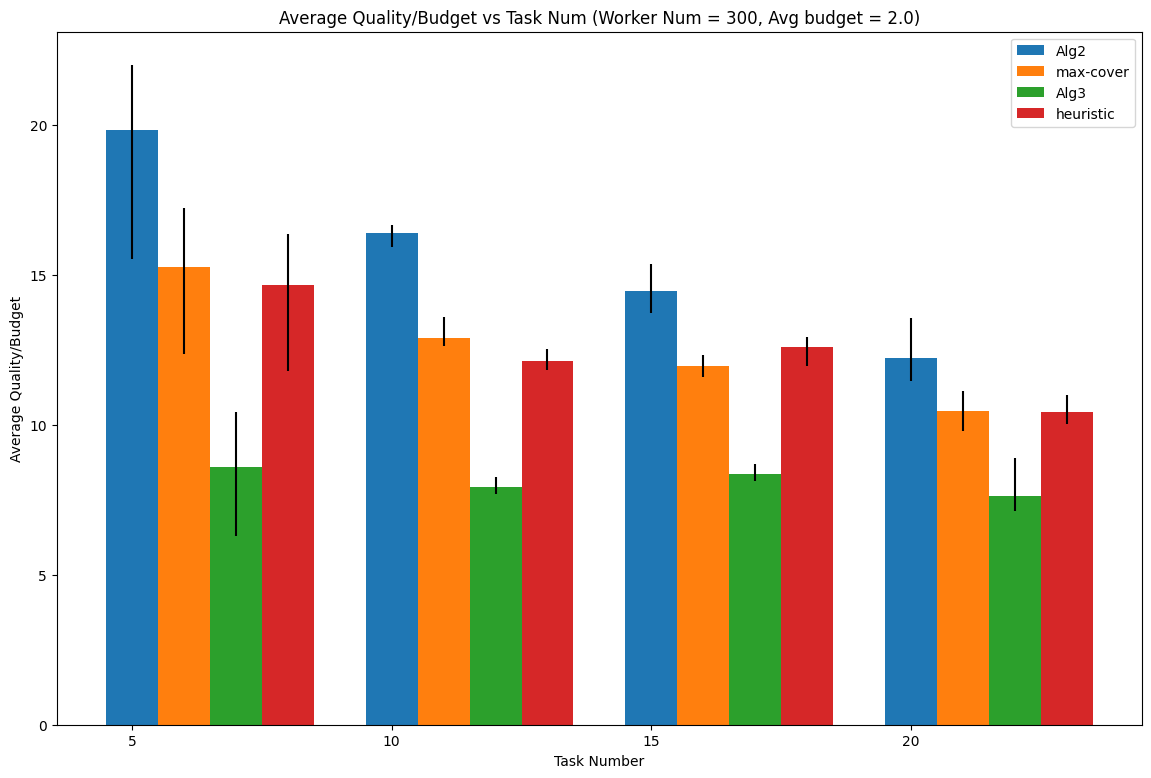

In [92]:
df2 = df.groupby(['method','task'])['avg-density'].agg(['mean','max','min']).reset_index()
import matplotlib.pyplot as plt

methods = ['budget','max-cover','matroid','heuristic']
labels = ['Alg2','max-cover','Alg3','heuristic']
bar_width = 0.2

# 设置位置偏移，以便将直方图居中显示
bar_positions = range(len(df2['task'].unique()))
# 绘制折线图
plt.figure(figsize=(14, 9))
x_labels = [5,10,15,20]
plt.xticks(bar_positions,x_labels)

for i,method in enumerate(methods):
    method_data = df2[df2['method'] == method]
    current_bar_positions = [pos + i * bar_width for pos in bar_positions]
    plt.bar(current_bar_positions, method_data['mean'],yerr=[method_data['mean']-method_data['min'],method_data['max']-method_data['mean']],width = bar_width,label=labels[i])

# 添加标签和图例
plt.xlabel('Task Number')
plt.ylabel('Average Quality/Budget')
plt.title('Average Quality/Budget vs Task Num (Worker Num = {}, Avg budget = {})'.format(worker_num,avg_budget))
plt.legend()

# 显示图形
plt.show()